In [334]:
import tensorflow as tf
from tensorflow import keras

In [335]:
import pandas as pd
import re
import contractions
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [336]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, GRU, Bidirectional

from gensim.models import Word2Vec

from keras.callbacks import EarlyStopping
from keras.models import load_model

In [337]:
!pip install tweet-preprocessor 

In [338]:
import preprocessor as p
import numpy as np 
import pandas as pd 
import emoji
import keras

import tensorflow as tf
from keras.models import Sequential



#sklearn
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#from keras.layers.recurrent import LSTM, GRU,SimpleRNN 
from keras.layers import Dense, Embedding, LSTM, GRU, Bidirectional,SimpleRNN

from keras.layers.core import Dense, Activation, Dropout
#from keras.layers.embeddings import Embedding

#importing  libraries
#Keras
import tensorflow.keras
from tensorflow.keras import regularizers, layers
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, Model, model_from_json
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling1D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint



from keras.utils import np_utils
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D
from keras.preprocessing import sequence, text
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import plotly.graph_objects as go
import plotly.express as px
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
#import transformers
#from transformers import TFAutoModel, AutoTokenizer
from tqdm.notebook import tqdm
#from tokenizers import Tokenizer, models, pre_tokenizers, decoders, processors
from tqdm import tqdm

In [339]:
## Save clean_df to csv file
#clean_df.to_csv('clean_df.csv', index=False)
Tweet_Dataset_model = pd.read_csv('Model_data.csv')

C:\Users\fatma.er\AppData\Local\Temp\ipykernel_8056\1083381354.py:3: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  Tweet_Dataset_model = pd.read_csv('Model_data.csv')


In [340]:
Tweet_Dataset_model.head()

,tweet_id,sentiment,content,content_token,synonym,clean_tweet,clean_tweet_token,sentiment_id
0,1.956968e+09,neutral,@dannycastillo We want to trade with someone w...,"['want', 'trade', 'someone', 'houston', 'ticke...","[['privation', 'want', 'deprivation', 'needine...",want trade someone houston ticket,"['want', 'trade', 'someone', 'houston', 'ticket']",3
1,1.956969e+09,neutral,cant fall asleep,"['cant', 'fall', 'asleep']","[['buzzword', 'cant', 'bank', 'cant', 'camber'...",cant fall asleep,"['cant', 'fall', 'asleep']",3
2,1.956972e+09,neutral,No Topic Maps talks at the Balisage Markup Con...,"['topic', 'map', 'talk', 'balisage', 'markup',...","[['subject', 'topic', 'theme', 'topic', 'subje...",topic map talk balisage markup conference prog...,"['topic', 'map', 'talk', 'balisage', 'markup',...",3
3,1.956975e+09,neutral,@cynthia_123 i cant sleep,"['cant', 'sleep']","[['buzzword', 'cant', 'bank', 'cant', 'camber'...",cant sleep,"['cant', 'sleep']",3
4,1.956976e+09,neutral,I missed the bl***y bus!!!!!!!!,"['missed', 'bly', 'bus']","[['miss', 'lose', 'miss', 'miss', 'neglect', '...",missed bl bus,"['missed', 'bl', 'bus']",3


In [341]:
Tweet_Dataset_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108628 entries, 0 to 108627
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   tweet_id           8356 non-null    float64
 1   sentiment          108628 non-null  object 
 2   content            108628 non-null  object 
 3   content_token      8356 non-null    object 
 4   synonym            8356 non-null    object 
 5   clean_tweet        108321 non-null  object 
 6   clean_tweet_token  108628 non-null  object 
 7   sentiment_id       108628 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 6.6+ MB


In [342]:
Tweet_Dataset_model.isnull().sum()

tweet_id             100272
sentiment                 0
content                   0
content_token        100272
synonym              100272
clean_tweet             307
clean_tweet_token         0
sentiment_id              0
dtype: int64

In [343]:
Tweet_Dataset_model = Tweet_Dataset_model[Tweet_Dataset_model['clean_tweet'].notna()]

In [344]:
Tweet_Dataset_model["sentiment"].value_counts()

boredom       8356
anger         8356
happiness     8349
love          8347
fun           8347
sadness       8346
relief        8346
enthusiasm    8340
hate          8337
worry         8331
surprise      8324
empty         8272
neutral       8270
Name: sentiment, dtype: int64

In [345]:
Tweet_Dataset_model.head()

,tweet_id,sentiment,content,content_token,synonym,clean_tweet,clean_tweet_token,sentiment_id
0,1.956968e+09,neutral,@dannycastillo We want to trade with someone w...,"['want', 'trade', 'someone', 'houston', 'ticke...","[['privation', 'want', 'deprivation', 'needine...",want trade someone houston ticket,"['want', 'trade', 'someone', 'houston', 'ticket']",3
1,1.956969e+09,neutral,cant fall asleep,"['cant', 'fall', 'asleep']","[['buzzword', 'cant', 'bank', 'cant', 'camber'...",cant fall asleep,"['cant', 'fall', 'asleep']",3
2,1.956972e+09,neutral,No Topic Maps talks at the Balisage Markup Con...,"['topic', 'map', 'talk', 'balisage', 'markup',...","[['subject', 'topic', 'theme', 'topic', 'subje...",topic map talk balisage markup conference prog...,"['topic', 'map', 'talk', 'balisage', 'markup',...",3
3,1.956975e+09,neutral,@cynthia_123 i cant sleep,"['cant', 'sleep']","[['buzzword', 'cant', 'bank', 'cant', 'camber'...",cant sleep,"['cant', 'sleep']",3
4,1.956976e+09,neutral,I missed the bl***y bus!!!!!!!!,"['missed', 'bly', 'bus']","[['miss', 'lose', 'miss', 'miss', 'neglect', '...",missed bl bus,"['missed', 'bl', 'bus']",3


In [346]:
x=Tweet_Dataset_model["clean_tweet"]
#y=Tweet_Dataset_model["sentiment"]
y=Tweet_Dataset_model["sentiment_id"]

In [347]:
x

0                         want trade someone houston ticket
1                                          cant fall asleep
2         topic map talk balisage markup conference prog...
3                                                cant sleep
4                                             missed bl bus
                                ...                        
108623    historic jesus time exist im witness hard prov...
108624      ack interpret testify horrible accounting taste
108625    ne er anything dear cultivate lapin life histo...
108626                         link ff quot work quot broke
108627              live begin retrieve solarise blcok haox
Name: clean_tweet, Length: 108321, dtype: object

In [348]:
y

0          3
1          3
2          3
3          3
4          3
          ..
108623    12
108624    12
108625    12
108626    12
108627    12
Name: sentiment_id, Length: 108321, dtype: int64

In [349]:
print("x Shape : {}".format(x.shape))
print("Y shape : {}".format(y.shape))

x Shape : (108321,)
Y shape : (108321,)


# LogisticRegression

In [246]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)
X_test

38580                 ahh featherbed thus cute happy mother
33863     sleep rite havin much tea nite failed test lpi...
67968     first year age going crafty raft mind though e...
93988                                  drill kayoed thinker
3502                                     need somewhere new
                                ...                        
80217     derisory find ilk plunge pocket billiards tang...
107797    hav casual acquire afford unfreeze tush plant ...
94518     problem flash isnt gpu accelerated atom swordp...
66124                                                  deal
11386                   never eat broadway pizza feelin ill
Name: clean_tweet, Length: 21665, dtype: object

In [247]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((86656,), (21665,), (86656,), (21665,))

In [248]:
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])

In [249]:
pipe_lr.fit(X_train,y_train)

C:\Users\fatma.er\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [250]:
pipe_lr.score(X_train,y_train)

0.8013293943870015

In [251]:
pipe_lr.score(X_test,y_test)

0.6130163858758366

In [252]:
alg_predictions= pipe_lr.predict(X_test)

In [253]:
y_test

38580      6
33863      6
67968      8
93988     10
3502       3
          ..
80217      0
107797    12
94518     10
66124     11
11386      4
Name: sentiment_id, Length: 21665, dtype: int64

In [254]:
alg_predictions 

array([ 6,  4,  7, ..., 10,  0,  1], dtype=int64)

In [256]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test,alg_predictions)
cnf_matrix

array([[1315,   28,   32,  101,   27,   34,   23,   39,   18,   22,   27,
          40,    5],
       [  80,  596,   72,  193,  255,   81,   62,   48,  104,   68,   40,
          67,   17],
       [  34,   43, 1265,   78,   24,   29,   30,   46,   18,   48,    9,
          51,    3],
       [  91,  118,   44,  644,  236,   71,   78,   72,   30,  133,   13,
          73,   13],
       [  46,  241,   35,  389,  508,   68,   77,   50,   82,  101,   22,
          49,   10],
       [  67,   69,   58,  149,   72,  833,   65,   80,   62,   97,   22,
          69,    8],
       [  49,   56,   61,  122,   60,   69,  831,   86,   31,  183,   18,
          80,   10],
       [  47,   32,   49,  104,   59,   62,   47, 1054,   25,   96,    9,
          39,    5],
       [  44,   71,   28,   63,   38,   38,   11,   35, 1251,   12,   22,
          30,    5],
       [  45,   56,   66,  237,   74,   88,  184,  135,   29,  612,   12,
         110,    6],
       [  16,    2,    6,    7,    2,    3,    3, 

Text(0.5, 427.9555555555555, 'Predicted label')

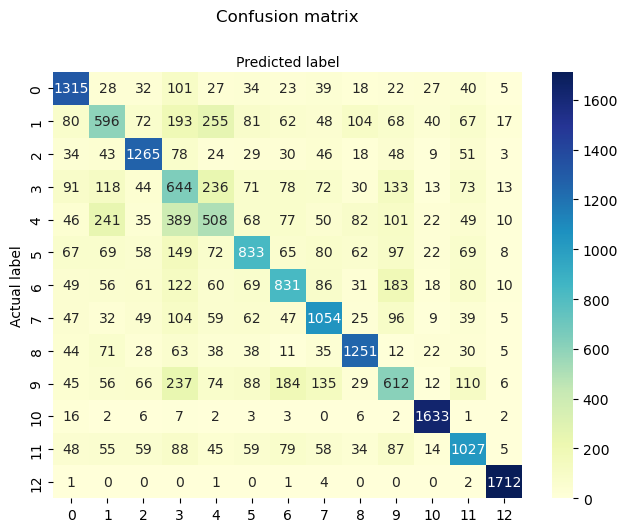

In [257]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#Text(0.5,257.44,'Predicted label');

{"empty":0, "sadness":1,"enthusiasm":2,"neutral":3,"worry":4,
                        "surprise":5,"love":6,"fun":7,"hate":8,"happiness":9,"boredom":10,"relief":11,"anger":12}

In [258]:


from sklearn.metrics import classification_report
print(classification_report(y_test,alg_predictions))

              precision    recall  f1-score   support

           0       0.70      0.77      0.73      1711
           1       0.44      0.35      0.39      1683
           2       0.71      0.75      0.73      1678
           3       0.30      0.40      0.34      1616
           4       0.36      0.30      0.33      1678
           5       0.58      0.50      0.54      1651
           6       0.56      0.50      0.53      1656
           7       0.62      0.65      0.63      1628
           8       0.74      0.76      0.75      1648
           9       0.42      0.37      0.39      1654
          10       0.89      0.97      0.93      1683
          11       0.63      0.62      0.62      1658
          12       0.95      0.99      0.97      1721

    accuracy                           0.61     21665
   macro avg       0.61      0.61      0.61     21665
weighted avg       0.61      0.61      0.61     21665



In [260]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, alg_predictions)*100)
print('Mean Squared Error:', metrics.mean_squared_error(y_test, alg_predictions)*100)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, alg_predictions))*100)

Mean Absolute Error: 150.77313639510731
Mean Squared Error: 829.3976459727671
Root Mean Squared Error: 287.9926467764007


# LTSM

In [31]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(Tweet_Dataset_model["sentiment_id"] )

onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
Y = onehot_encoder.fit_transform(integer_encoded)

C:\Users\fatma.er\AppData\Local\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [32]:
X_train, X_test, y_train, y_test = train_test_split(Tweet_Dataset_model.clean_tweet,Y, random_state=40, test_size=0.2, shuffle=True)

In [33]:


from tensorflow.keras.preprocessing.sequence import pad_sequences

In [34]:
# using keras tokenizer here
token = text.Tokenizer(num_words=None)
max_len = 160
Epoch = 5
token.fit_on_texts(list(X_train) + list(X_test))
X_train_pad = pad_sequences(token.texts_to_sequences(X_train), maxlen=max_len)
X_test_pad = pad_sequences(token.texts_to_sequences(X_test), maxlen=max_len)

In [35]:
w_idx = token.word_index

In [36]:
embed_dim = 160
lstm_out = 250

model = Sequential()
model.add(Embedding(len(w_idx) +1 , embed_dim,input_length = X_test_pad.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(keras.layers.core.Dense(13, activation='softmax'))
#adam rmsprop 
model.compile(loss = "categorical_crossentropy", optimizer='adam',metrics = ['accuracy'])
print(model.summary())



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 160, 160)          5268960   
                                                                 
 spatial_dropout1d (SpatialD  (None, 160, 160)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 250)               411000    
                                                                 
 dense (Dense)               (None, 13)                3263      
                                                                 
Total params: 5,683,223
Trainable params: 5,683,223
Non-trainable params: 0
_________________________________________________________________
None


In [37]:
# Calculate pre-training accuracy 
score = model.evaluate(X_test_pad, y_test, verbose=1)
accuracy = 100*score[1]

print("Pre-training accuracy: %.4f%%" % accuracy) 

678/678 [==============================] - 58s 84ms/step - loss: 2.5650 - accuracy: 0.0769
Pre-training accuracy: 7.6944%


In [38]:
batch_size = 32

In [39]:
model_all=model.fit(X_train_pad, y_train, epochs = Epoch, batch_size=batch_size,validation_data=(X_test_pad, y_test))


Epoch 1/5
2708/2708 [==============================] - 2737s 1s/step - loss: 1.6959 - accuracy: 0.4268 - val_loss: 1.2820 - val_accuracy: 0.5640
Epoch 2/5
2708/2708 [==============================] - 2531s 934ms/step - loss: 0.9923 - accuracy: 0.6649 - val_loss: 1.0682 - val_accuracy: 0.6397
Epoch 3/5
2708/2708 [==============================] - 19041s 7s/step - loss: 0.7065 - accuracy: 0.7615 - val_loss: 1.0270 - val_accuracy: 0.6695
Epoch 4/5
2708/2708 [==============================] - 5208s 2s/step - loss: 0.5361 - accuracy: 0.8191 - val_loss: 1.0251 - val_accuracy: 0.6842
Epoch 5/5
2708/2708 [==============================] - 2411s 890ms/step - loss: 0.4301 - accuracy: 0.8541 - val_loss: 1.0760 - val_accuracy: 0.6899


In [40]:
score = model.evaluate(X_train_pad, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(X_test_pad, y_test, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.9137393832206726
Testing Accuracy:  0.6898684501647949


In [41]:
test_accuracy=model.evaluate(X_test_pad,y_test,verbose=0)
print(test_accuracy[1])

0.6898684501647949


In [42]:
#model.predict_classes(X_test)
predict_x=model.predict(X_test_pad) 
classes_x=np.argmax(predict_x,axis=1)
print(classes_x)

678/678 [==============================] - 35931s 53s/step
[ 6  1  8 ... 10  5  1]


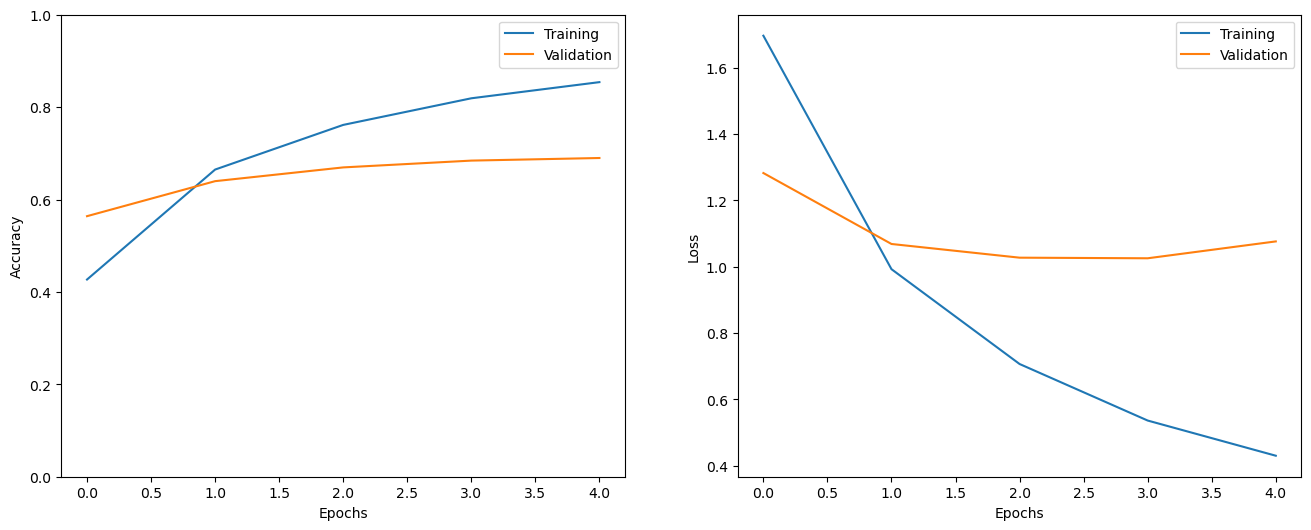

In [43]:
def show_history(model_all):
    epochs_trained = len(model_all.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), model_all.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), model_all.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), model_all.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), model_all.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

show_history(model_all)

In [44]:
train_hist = pd.DataFrame(model_all.history)
train_hist

,loss,accuracy,val_loss,val_accuracy
0,1.695904,0.426814,1.282048,0.563951
1,0.992281,0.664859,1.068226,0.639742
2,0.706493,0.761505,1.026971,0.669513
3,0.536090,0.819124,1.025148,0.684237
4,0.430077,0.854078,1.075970,0.689868


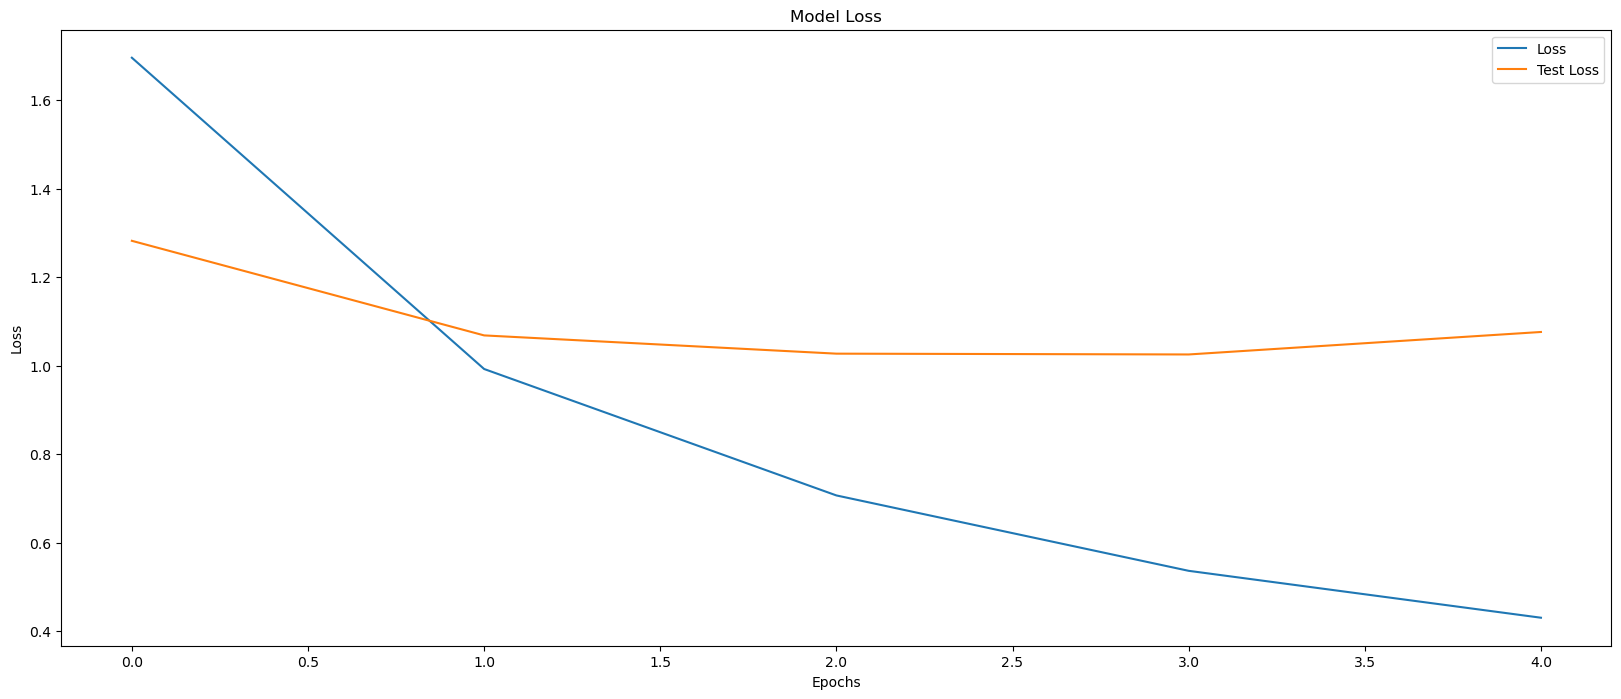

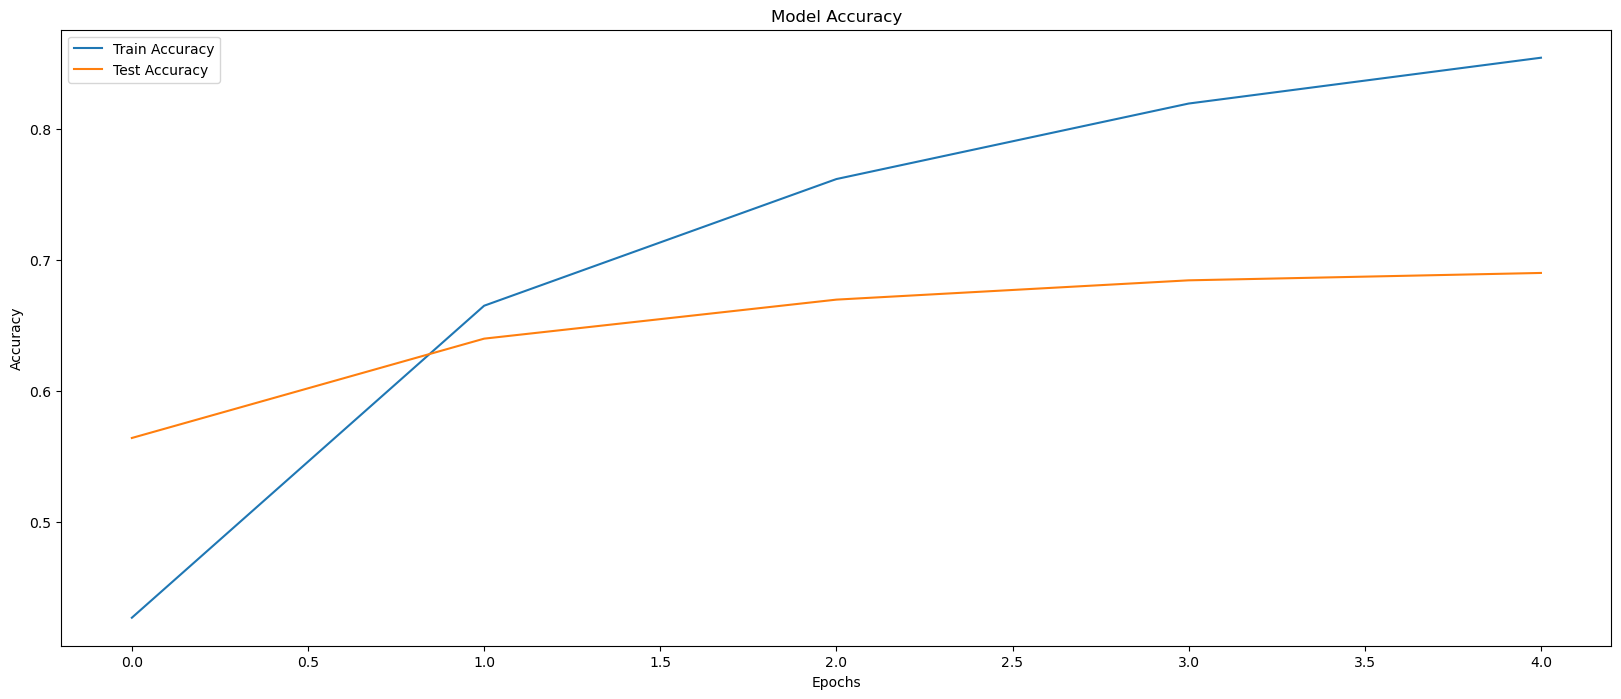

In [45]:
plt.figure(figsize=(20,8))
plt.plot(train_hist[['loss','val_loss']])
plt.legend(['Loss','Test Loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.figure(figsize=(20,8))
plt.plot(train_hist[['accuracy','val_accuracy']])
plt.legend(['Train Accuracy','Test Accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [130]:
print(train_hist["val_accuracy"].describe())

count    5.000000
mean     0.649462
std      0.051601
min      0.563951
25%      0.639742
50%      0.669513
75%      0.684237
max      0.689868
Name: val_accuracy, dtype: float64


#LSTM Future Work 

Bi-LSTM Networks

Bidirectional long-short term memory (Bi-LSTM) is a Neural Network architecture where makes use of information in both directions forward(past to future) or backward (future to past).  https://www.analyticsvidhya.com/blog/2021/10/emotion-detection-using-bidirectional-lstm-and-word2vec/

In [146]:
Tweet_Dataset_model.head()

,tweet_id,sentiment,content,content_token,synonym,clean_tweet,clean_tweet_token,sentiment_id
0,1.956968e+09,neutral,@dannycastillo We want to trade with someone w...,"['want', 'trade', 'someone', 'houston', 'ticke...","[['privation', 'want', 'deprivation', 'needine...",want trade someone houston ticket,"['want', 'trade', 'someone', 'houston', 'ticket']",3
1,1.956969e+09,neutral,cant fall asleep,"['cant', 'fall', 'asleep']","[['buzzword', 'cant', 'bank', 'cant', 'camber'...",cant fall asleep,"['cant', 'fall', 'asleep']",3
2,1.956972e+09,neutral,No Topic Maps talks at the Balisage Markup Con...,"['topic', 'map', 'talk', 'balisage', 'markup',...","[['subject', 'topic', 'theme', 'topic', 'subje...",topic map talk balisage markup conference prog...,"['topic', 'map', 'talk', 'balisage', 'markup',...",3
3,1.956975e+09,neutral,@cynthia_123 i cant sleep,"['cant', 'sleep']","[['buzzword', 'cant', 'bank', 'cant', 'camber'...",cant sleep,"['cant', 'sleep']",3
4,1.956976e+09,neutral,I missed the bl***y bus!!!!!!!!,"['missed', 'bly', 'bus']","[['miss', 'lose', 'miss', 'miss', 'neglect', '...",missed bl bus,"['missed', 'bl', 'bus']",3


In [147]:
X_train, X_test, y_train, y_test = train_test_split(Tweet_Dataset_model.clean_tweet,Tweet_Dataset_model.sentiment_id, random_state=40, test_size=0.2, shuffle=True)

In [ ]:
from keras.utils import to_categorical
y_train = to_categorical(df_cleaned_train.Sentiment.values)
y_test = to_categorical(df_test.Sentiment.values)

In [148]:
y_train

76434      0
97133     10
15521      4
2245       3
107508    12
          ..
56933      7
93483     10
80293      0
30854      9
11682      4
Name: sentiment_id, Length: 86656, dtype: int64

In [149]:
y_train = to_categorical(y_train.values)

In [150]:
y_train

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [151]:
y_test

38580      6
33863      6
67968      8
93988     10
3502       3
          ..
80217      0
107797    12
94518     10
66124     11
11386      4
Name: sentiment_id, Length: 21665, dtype: int64

In [152]:
y_test = to_categorical(y_test.values)

In [153]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [154]:
#y_val, y_test, y_train are now a binary matrix that will be passed in our model.

In [155]:
X_train

76434     glenna bore gladiola beautiful macy went swimm...
97133     likelihood coiffe theatre process mummy recall...
15521              think sandwich something like ham cheese
2245                                               hm guess
107508                   turn lead puzzle loathly tan chest
                                ...                        
56933     single think since ane bank rattling decide un...
93483            atomic number sooooooo tire inward textile
80293                         yu th trang n xem recommended
30854                      today best lt eff yeah iodine lt
11682                              best friend vega without
Name: clean_tweet, Length: 86656, dtype: object

In [156]:
X_test

38580                 ahh featherbed thus cute happy mother
33863     sleep rite havin much tea nite failed test lpi...
67968     first year age going crafty raft mind though e...
93988                                  drill kayoed thinker
3502                                     need somewhere new
                                ...                        
80217     derisory find ilk plunge pocket billiards tang...
107797    hav casual acquire afford unfreeze tush plant ...
94518     problem flash isnt gpu accelerated atom swordp...
66124                                                  deal
11386                   never eat broadway pizza feelin ill
Name: clean_tweet, Length: 21665, dtype: object

In [183]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence

 using keras tokenizer here
token = tf.keras.preprocessing.text.Tokenizer(
    num_words=1000
)

num_words = 10000

In [194]:
X_train=token.texts_to_sequences(X_train) # this converts texts into some numeric sequences 
X_train_pad=pad_sequences(X_train,maxlen=300,padding='post') # this makes the length of all numeric sequences equal 
X_test = token.texts_to_sequences(X_test)
X_test_pad = pad_sequences(X_test, maxlen = 300, padding = 'post')

texts_to_sequence() takes a list of sentences and converts them into a sequence of numbers.

Since in our data different sentences have different lengths, it means the number sequence made by texts_to_sequence will also have different lengths. in order to pass them in our model, we must make all of them of the same length.

pad_sequences is used to ensure that all sequences in a list have the same length. By default, this is done by padding 0 at the beginning/end (pre, post) of each sequence until each sequence has the same length as the longest sequence. If in case the sequence length is greater than maxlen, it also trims from the end.

In [195]:
X_train_pad.shape

(86656, 300)

In [196]:
X_test_pad.shape

(21665, 300)

#pip install gensim
import gensim.downloader as api
glove_gensim  = api.load('glove-wiki-gigaword-100') #100 dimension

vector_size = 100
gensim_weight_matrix = np.zeros((num_words ,vector_size))
gensim_weight_matrix.shape
for word, index in token.word_index.items():
    if index < num_words: # since index starts with zero 
        if word in glove_gensim.wv.vocab:
            gensim_weight_matrix[index] = glove_gensim[word]
        else:
            gensim_weight_matrix[index] = np.zeros(100)

Emotion Detection Model Building  Future work we can do it also 

In [199]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, LSTM, Embedding,Bidirectional
import tensorflow
from tensorflow.compat.v1.keras.layers import CuDNNLSTM
from tensorflow.keras.layers import Dropout

In [224]:
EMBEDDING_DIM = 100
class_num = 13
model = Sequential()
model.add(Embedding(input_dim = num_words,output_dim = EMBEDDING_DIM,input_length= X_train_pad.shape[1],weights = [gensim_weight_matrix],trainable = False))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(100,return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(200,return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(100,return_sequences=False)))
model.add(Dense(class_num, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam',metrics = 'accuracy')

In [225]:
#EarlyStopping and ModelCheckpoint
from keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 12)
mc = ModelCheckpoint('./model.h5', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True)

history_embedding = model.fit(X_train_pad, y_train, 
                                epochs = 5, batch_size = 32, 
                                validation_data=(X_test_pad, y_test),
                                verbose = 1, callbacks= [es, mc]  )

plt.plot(history_embedding.history['accuracy'],c='b',label='train accuracy')
plt.plot(history_embedding.history['val_accuracy'],c='r',label='validation accuracy')
plt.legend(loc='lower right')
plt.show()

#Test the Emotion Detection Model
#We have prepared X_test_pad for testing purposes, it’s time to test on it.

np.argmax returns the index of maximum probability.

y_pred =   np.argmax(model.predict(X_test_pad), axis  =  1)
y_true = np.argmax(y_test, axis = 1)
from sklearn import metrics
print(metrics.classification_report(y_pred, y_true))

In [350]:
data=Tweet_Dataset_model

In [351]:
data

,tweet_id,sentiment,content,content_token,synonym,clean_tweet,clean_tweet_token,sentiment_id
0,1.956968e+09,neutral,@dannycastillo We want to trade with someone w...,"['want', 'trade', 'someone', 'houston', 'ticke...","[['privation', 'want', 'deprivation', 'needine...",want trade someone houston ticket,"['want', 'trade', 'someone', 'houston', 'ticket']",3
1,1.956969e+09,neutral,cant fall asleep,"['cant', 'fall', 'asleep']","[['buzzword', 'cant', 'bank', 'cant', 'camber'...",cant fall asleep,"['cant', 'fall', 'asleep']",3
2,1.956972e+09,neutral,No Topic Maps talks at the Balisage Markup Con...,"['topic', 'map', 'talk', 'balisage', 'markup',...","[['subject', 'topic', 'theme', 'topic', 'subje...",topic map talk balisage markup conference prog...,"['topic', 'map', 'talk', 'balisage', 'markup',...",3
3,1.956975e+09,neutral,@cynthia_123 i cant sleep,"['cant', 'sleep']","[['buzzword', 'cant', 'bank', 'cant', 'camber'...",cant sleep,"['cant', 'sleep']",3
4,1.956976e+09,neutral,I missed the bl***y bus!!!!!!!!,"['missed', 'bly', 'bus']","[['miss', 'lose', 'miss', 'miss', 'neglect', '...",missed bl bus,"['missed', 'bl', 'bus']",3
...,...,...,...,...,...,...,...,...
108623,NaN,anger,Did a historic Jesus of_all_time exist? Im wi...,NaN,NaN,historic jesus time exist im witness hard prov...,"['historic', 'jesus', 'time', 'exist', 'im', '...",12
108624,NaN,anger,@mikeavila ack! I just interpret about your t...,NaN,NaN,ack interpret testify horrible accounting taste,"['ack', 'interpret', 'testify', 'horrible', 'a...",12
108625,NaN,anger,ne'er does anything dear cultivate and lapin ...,NaN,NaN,ne er anything dear cultivate lapin life histo...,"['ne', 'er', 'anything', 'dear', 'cultivate', ...",12
108626,NaN,anger,@mashable Link to ff &quot;how it works&quot;...,NaN,NaN,link ff quot work quot broke,"['link', 'ff', 'quot', 'work', 'quot', 'broke']",12


In [352]:
#Bag of words

In [353]:
#Split data into training and testing sets 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data["clean_tweet"], 
                                                    data["sentiment_id"], test_size = 0.2, random_state = 42)

print("training set :",x_train.shape,y_train.shape)
print("testing set :",x_test.shape,y_test.shape)

training set : (86656,) (86656,)
testing set : (21665,) (21665,)


In [354]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
count_vect = CountVectorizer(stop_words='english')
transformer = TfidfTransformer(norm='l2',sublinear_tf=True)

In [355]:
x_train_counts = count_vect.fit_transform(x_train)
x_train_tfidf = transformer.fit_transform(x_train_counts)

print(x_train_counts.shape)
print(x_train_tfidf.shape)

(86656, 30520)
(86656, 30520)


In [356]:
x_test_counts = count_vect.transform(x_test)
x_test_tfidf = transformer.transform(x_test_counts)

print(x_test_counts.shape)
print(x_test_tfidf.shape)

(21665, 30520)
(21665, 30520)


Model building Random Forest Classifier

In [286]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200)
model.fit(x_train_tfidf,y_train)

RandomForestClassifier(n_estimators=200)

In [287]:
predictions = model.predict(x_test_tfidf)

In [288]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions)*100)  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions)*100)  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions))*100)

Mean Absolute Error: 117.74290330025387
Mean Squared Error: 613.593353334872
Root Mean Squared Error: 247.70816565766899


In [289]:
#Accuracy_score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)*100

68.08677590583892

In [291]:
predictions

array([ 5, 12, 10, ..., 10,  7,  0], dtype=int64)

In [292]:
y_test

44781      5
101336    12
99742     10
87880      2
26458      9
          ..
76359      0
29515      9
94172     10
52690      7
76200      0
Name: sentiment_id, Length: 21665, dtype: int64

In [293]:
#from sklearn.metrics import confusion_matrix,f1_score
#confusion_matrix(y_test,predictions)
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test,predictions)
cnf_matrix

array([[1475,   17,   14,   51,   19,   25,   17,    6,   29,    8,   27,
          18,    2],
       [  47,  648,   30,  236,  265,   72,   59,   61,   88,   82,   29,
          40,    7],
       [  26,   12, 1435,   28,   11,   25,   15,   15,   15,   21,    6,
          15,    6],
       [  57,  160,   50,  632,  258,   71,  109,   67,   36,  166,   16,
          56,    9],
       [  45,  258,   18,  396,  511,   60,   89,   52,   64,  147,   14,
          29,    8],
       [  57,   45,   23,  144,   92, 1148,   54,   53,   31,   53,    7,
          35,    2],
       [  37,   44,   27,  107,   62,   53, 1060,   63,   31,  150,    6,
          50,    2],
       [  28,   20,   18,   69,   47,   46,   53, 1278,   22,   50,    8,
          34,    3],
       [  32,   25,   14,   41,   41,   42,   15,   22, 1350,   15,    6,
          24,    2],
       [  43,   55,   29,  197,  105,   47,  178,  109,   22,  769,   13,
          76,    2],
       [   2,    8,    2,    7,    4,    2,    0, 

Text(0.5, 427.9555555555555, 'Predicted label')

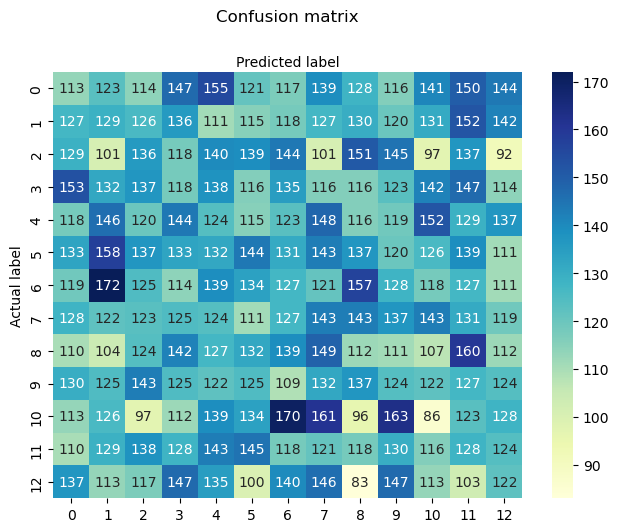

In [371]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#Text(0.5,257.44,'Predicted label');

In [294]:


from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82      1708
           1       0.49      0.39      0.44      1664
           2       0.85      0.88      0.86      1630
           3       0.32      0.37      0.34      1687
           4       0.35      0.30      0.32      1691
           5       0.70      0.66      0.68      1744
           6       0.63      0.63      0.63      1692
           7       0.73      0.76      0.74      1676
           8       0.79      0.83      0.81      1629
           9       0.51      0.47      0.49      1645
          10       0.92      0.98      0.95      1648
          11       0.76      0.75      0.76      1648
          12       0.97      0.99      0.98      1603

    accuracy                           0.68     21665
   macro avg       0.68      0.68      0.68     21665
weighted avg       0.68      0.68      0.68     21665



PREDICTION MODEL

In [366]:
## Save clean_df to csv file
#clean_df.to_csv('clean_df.csv', index=False)
movie_predict = pd.read_csv('Movie_df_model.csv')

In [367]:
movie_predict.head()

,character_id,character_name,gender,movie_id,movie_name,release_year,conversation_id,reply_to,text,text_movie_token,clean_text
0,u0,BIANCA,f,m0,NaN,NaN,L1044,L1044,They do not!,[],they do not
1,u0,BIANCA,f,m0,NaN,NaN,L984,L984,I hope so.,['hope'],i hope so
2,u0,BIANCA,f,m0,NaN,NaN,L924,L924,Let's go.,"['let', 'go']",let s go
3,u0,BIANCA,f,m0,NaN,NaN,L870,L871,Okay -- you're gonna need to learn how to lie.,"['okay', 'youre', 'gon', 'na', 'need', 'learn'...",okay you re gonna need to learn how to lie
4,u0,BIANCA,f,m0,10 things i hate about you,1999,L870,NaN,I'm kidding. You know how sometimes you just ...,"['im', 'kidding', 'know', 'sometimes', 'become...",i m kidding you know how sometimes you just ...


In [368]:
movie_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304713 entries, 0 to 304712
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   character_id      304713 non-null  object
 1   character_name    304670 non-null  object
 2   gender            304713 non-null  object
 3   movie_id          304713 non-null  object
 4   movie_name        83097 non-null   object
 5   release_year      83097 non-null   object
 6   conversation_id   304713 non-null  object
 7   reply_to          221616 non-null  object
 8   text              304446 non-null  object
 9   text_movie_token  304713 non-null  object
 10  clean_text        304446 non-null  object
dtypes: object(11)
memory usage: 25.6+ MB


In [369]:
movie_predict2 = movie_predict[movie_predict['text'].notna()]

In [370]:
x_pre_counts = count_vect.transform(movie_predict2["text"])
x_pre_tfidf = transformer.transform(x_pre_counts)

In [83]:
predictions_model = model.predict(x_pre_tfidf)

In [84]:
predictions_model

array([ 3, 11,  9, ...,  3,  6,  9], dtype=int64)

In [85]:
movie_predict2["emotion"]=predictions_model
movie_predict2

C:\Users\fatma.er\AppData\Local\Temp\ipykernel_8056\4116298531.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_predict2["emotion"]=predictions_model


,character_id,character_name,gender,movie_id,movie_name,release_year,conversation_id,reply_to,text,text_movie_token,clean_text,emotion
0,u0,BIANCA,f,m0,NaN,NaN,L1044,L1044,They do not!,[],they do not,3
1,u0,BIANCA,f,m0,NaN,NaN,L984,L984,I hope so.,['hope'],i hope so,11
2,u0,BIANCA,f,m0,NaN,NaN,L924,L924,Let's go.,"['let', 'go']",let s go,9
3,u0,BIANCA,f,m0,NaN,NaN,L870,L871,Okay -- you're gonna need to learn how to lie.,"['okay', 'youre', 'gon', 'na', 'need', 'learn'...",okay you re gonna need to learn how to lie,4
4,u0,BIANCA,f,m0,10 things i hate about you,1999,L870,NaN,I'm kidding. You know how sometimes you just ...,"['im', 'kidding', 'know', 'sometimes', 'become...",i m kidding you know how sometimes you just ...,3
...,...,...,...,...,...,...,...,...,...,...,...,...
304708,u998,KATE,f,m65,NaN,NaN,L227495,L227495,-- you got your microwave --,"['got', 'microwave']",you got your microwave,3
304709,u999,KELLY HOUGE,?,m65,NaN,NaN,L227588,L227594,Is it safe to assume that because the death co...,"['safe', 'assume', 'death', 'count', 'involved...",is it safe to assume that because the death co...,11
304710,u999,KELLY HOUGE,?,m65,NaN,NaN,L227588,L227592,What about the report from an eyewitness at th...,"['report', 'eyewitness', 'liquor', 'store', 's...",what about the report from an eyewitness at th...,3
304711,u999,KELLY HOUGE,?,m65,NaN,NaN,L227588,L227590,Are you optimistic about the safety of the hos...,"['optimistic', 'safety', 'hostage', 'took', 'a...",are you optimistic about the safety of the hos...,6


In [86]:
sent_to_2  = {0:"empty", 1:"sadness", 2:"enthusiasm", 3:"neutral", 4:"worry", 5:"surprise", 6:"love",
              7:"fun", 8:"hate", 9:"happiness", 10:"boredom", 11:"relief", 12:"anger"}

In [87]:
movie_predict2["Emotion_text"] = movie_predict2['emotion'].map(sent_to_2)

C:\Users\fatma.er\AppData\Local\Temp\ipykernel_8056\162671880.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_predict2["Emotion_text"] = movie_predict2['emotion'].map(sent_to_2)


In [88]:
movie_predict2

,character_id,character_name,gender,movie_id,movie_name,release_year,conversation_id,reply_to,text,text_movie_token,clean_text,emotion,Emotion_text
0,u0,BIANCA,f,m0,NaN,NaN,L1044,L1044,They do not!,[],they do not,3,neutral
1,u0,BIANCA,f,m0,NaN,NaN,L984,L984,I hope so.,['hope'],i hope so,11,relief
2,u0,BIANCA,f,m0,NaN,NaN,L924,L924,Let's go.,"['let', 'go']",let s go,9,happiness
3,u0,BIANCA,f,m0,NaN,NaN,L870,L871,Okay -- you're gonna need to learn how to lie.,"['okay', 'youre', 'gon', 'na', 'need', 'learn'...",okay you re gonna need to learn how to lie,4,worry
4,u0,BIANCA,f,m0,10 things i hate about you,1999,L870,NaN,I'm kidding. You know how sometimes you just ...,"['im', 'kidding', 'know', 'sometimes', 'become...",i m kidding you know how sometimes you just ...,3,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...
304708,u998,KATE,f,m65,NaN,NaN,L227495,L227495,-- you got your microwave --,"['got', 'microwave']",you got your microwave,3,neutral
304709,u999,KELLY HOUGE,?,m65,NaN,NaN,L227588,L227594,Is it safe to assume that because the death co...,"['safe', 'assume', 'death', 'count', 'involved...",is it safe to assume that because the death co...,11,relief
304710,u999,KELLY HOUGE,?,m65,NaN,NaN,L227588,L227592,What about the report from an eyewitness at th...,"['report', 'eyewitness', 'liquor', 'store', 's...",what about the report from an eyewitness at th...,3,neutral
304711,u999,KELLY HOUGE,?,m65,NaN,NaN,L227588,L227590,Are you optimistic about the safety of the hos...,"['optimistic', 'safety', 'hostage', 'took', 'a...",are you optimistic about the safety of the hos...,6,love


In [89]:
x_pre_counts = count_vect.transform(movie_predict2["text_movie_token"])
x_pre_tfidf = transformer.transform(x_pre_counts)

In [90]:
predictions_model2 = model.predict(x_pre_tfidf)

In [91]:
predictions_model2

array([ 3, 11,  9, ...,  3,  6,  9], dtype=int64)

In [92]:
movie_predict2["emotion"]=predictions_model2
movie_predict2

C:\Users\fatma.er\AppData\Local\Temp\ipykernel_8056\1689740400.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_predict2["emotion"]=predictions_model2


,character_id,character_name,gender,movie_id,movie_name,release_year,conversation_id,reply_to,text,text_movie_token,clean_text,emotion,Emotion_text
0,u0,BIANCA,f,m0,NaN,NaN,L1044,L1044,They do not!,[],they do not,3,neutral
1,u0,BIANCA,f,m0,NaN,NaN,L984,L984,I hope so.,['hope'],i hope so,11,relief
2,u0,BIANCA,f,m0,NaN,NaN,L924,L924,Let's go.,"['let', 'go']",let s go,9,happiness
3,u0,BIANCA,f,m0,NaN,NaN,L870,L871,Okay -- you're gonna need to learn how to lie.,"['okay', 'youre', 'gon', 'na', 'need', 'learn'...",okay you re gonna need to learn how to lie,4,worry
4,u0,BIANCA,f,m0,10 things i hate about you,1999,L870,NaN,I'm kidding. You know how sometimes you just ...,"['im', 'kidding', 'know', 'sometimes', 'become...",i m kidding you know how sometimes you just ...,3,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...
304708,u998,KATE,f,m65,NaN,NaN,L227495,L227495,-- you got your microwave --,"['got', 'microwave']",you got your microwave,3,neutral
304709,u999,KELLY HOUGE,?,m65,NaN,NaN,L227588,L227594,Is it safe to assume that because the death co...,"['safe', 'assume', 'death', 'count', 'involved...",is it safe to assume that because the death co...,3,relief
304710,u999,KELLY HOUGE,?,m65,NaN,NaN,L227588,L227592,What about the report from an eyewitness at th...,"['report', 'eyewitness', 'liquor', 'store', 's...",what about the report from an eyewitness at th...,3,neutral
304711,u999,KELLY HOUGE,?,m65,NaN,NaN,L227588,L227590,Are you optimistic about the safety of the hos...,"['optimistic', 'safety', 'hostage', 'took', 'a...",are you optimistic about the safety of the hos...,6,love


In [93]:
sent_to_2  = {0:"empty", 1:"sadness", 2:"enthusiasm", 3:"neutral", 4:"worry", 5:"surprise", 6:"love",
              7:"fun", 8:"hate", 9:"happiness", 10:"boredom", 11:"relief", 12:"anger"}

In [94]:
movie_predict2["Emotion_text2"] = movie_predict2['emotion'].map(sent_to_2)

C:\Users\fatma.er\AppData\Local\Temp\ipykernel_8056\1253215926.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_predict2["Emotion_text2"] = movie_predict2['emotion'].map(sent_to_2)


In [95]:
movie_predict2

,character_id,character_name,gender,movie_id,movie_name,release_year,conversation_id,reply_to,text,text_movie_token,clean_text,emotion,Emotion_text,Emotion_text2
0,u0,BIANCA,f,m0,NaN,NaN,L1044,L1044,They do not!,[],they do not,3,neutral,neutral
1,u0,BIANCA,f,m0,NaN,NaN,L984,L984,I hope so.,['hope'],i hope so,11,relief,relief
2,u0,BIANCA,f,m0,NaN,NaN,L924,L924,Let's go.,"['let', 'go']",let s go,9,happiness,happiness
3,u0,BIANCA,f,m0,NaN,NaN,L870,L871,Okay -- you're gonna need to learn how to lie.,"['okay', 'youre', 'gon', 'na', 'need', 'learn'...",okay you re gonna need to learn how to lie,4,worry,worry
4,u0,BIANCA,f,m0,10 things i hate about you,1999,L870,NaN,I'm kidding. You know how sometimes you just ...,"['im', 'kidding', 'know', 'sometimes', 'become...",i m kidding you know how sometimes you just ...,3,neutral,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304708,u998,KATE,f,m65,NaN,NaN,L227495,L227495,-- you got your microwave --,"['got', 'microwave']",you got your microwave,3,neutral,neutral
304709,u999,KELLY HOUGE,?,m65,NaN,NaN,L227588,L227594,Is it safe to assume that because the death co...,"['safe', 'assume', 'death', 'count', 'involved...",is it safe to assume that because the death co...,3,relief,neutral
304710,u999,KELLY HOUGE,?,m65,NaN,NaN,L227588,L227592,What about the report from an eyewitness at th...,"['report', 'eyewitness', 'liquor', 'store', 's...",what about the report from an eyewitness at th...,3,neutral,neutral
304711,u999,KELLY HOUGE,?,m65,NaN,NaN,L227588,L227590,Are you optimistic about the safety of the hos...,"['optimistic', 'safety', 'hostage', 'took', 'a...",are you optimistic about the safety of the hos...,6,love,love


In [96]:
movie_predict2.to_csv('movie_predict_emotion.csv', index=False)

In [97]:
#clean_df.to_csv('clean_df.csv', index=False)
movie_predict2 = pd.read_csv('movie_predict_emotion.csv')

In [98]:
movie_predict2

,character_id,character_name,gender,movie_id,movie_name,release_year,conversation_id,reply_to,text,text_movie_token,clean_text,emotion,Emotion_text,Emotion_text2
0,u0,BIANCA,f,m0,NaN,NaN,L1044,L1044,They do not!,[],they do not,3,neutral,neutral
1,u0,BIANCA,f,m0,NaN,NaN,L984,L984,I hope so.,['hope'],i hope so,11,relief,relief
2,u0,BIANCA,f,m0,NaN,NaN,L924,L924,Let's go.,"['let', 'go']",let s go,9,happiness,happiness
3,u0,BIANCA,f,m0,NaN,NaN,L870,L871,Okay -- you're gonna need to learn how to lie.,"['okay', 'youre', 'gon', 'na', 'need', 'learn'...",okay you re gonna need to learn how to lie,4,worry,worry
4,u0,BIANCA,f,m0,10 things i hate about you,1999,L870,NaN,I'm kidding. You know how sometimes you just ...,"['im', 'kidding', 'know', 'sometimes', 'become...",i m kidding you know how sometimes you just ...,3,neutral,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304441,u998,KATE,f,m65,NaN,NaN,L227495,L227495,-- you got your microwave --,"['got', 'microwave']",you got your microwave,3,neutral,neutral
304442,u999,KELLY HOUGE,?,m65,NaN,NaN,L227588,L227594,Is it safe to assume that because the death co...,"['safe', 'assume', 'death', 'count', 'involved...",is it safe to assume that because the death co...,3,relief,neutral
304443,u999,KELLY HOUGE,?,m65,NaN,NaN,L227588,L227592,What about the report from an eyewitness at th...,"['report', 'eyewitness', 'liquor', 'store', 's...",what about the report from an eyewitness at th...,3,neutral,neutral
304444,u999,KELLY HOUGE,?,m65,NaN,NaN,L227588,L227590,Are you optimistic about the safety of the hos...,"['optimistic', 'safety', 'hostage', 'took', 'a...",are you optimistic about the safety of the hos...,6,love,love


In [99]:
#M0=(movie_predict2['movieid']='m0')

rslt_df = movie_predict2[(movie_predict2['movie_id'] == 'm0')]

In [100]:
rslt_df 

,character_id,character_name,gender,movie_id,movie_name,release_year,conversation_id,reply_to,text,text_movie_token,clean_text,emotion,Emotion_text,Emotion_text2
0,u0,BIANCA,f,m0,NaN,NaN,L1044,L1044,They do not!,[],they do not,3,neutral,neutral
1,u0,BIANCA,f,m0,NaN,NaN,L984,L984,I hope so.,['hope'],i hope so,11,relief,relief
2,u0,BIANCA,f,m0,NaN,NaN,L924,L924,Let's go.,"['let', 'go']",let s go,9,happiness,happiness
3,u0,BIANCA,f,m0,NaN,NaN,L870,L871,Okay -- you're gonna need to learn how to lie.,"['okay', 'youre', 'gon', 'na', 'need', 'learn'...",okay you re gonna need to learn how to lie,4,worry,worry
4,u0,BIANCA,f,m0,10 things i hate about you,1999,L870,NaN,I'm kidding. You know how sometimes you just ...,"['im', 'kidding', 'know', 'sometimes', 'become...",i m kidding you know how sometimes you just ...,3,neutral,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300512,u9,PATRICK,m,m0,NaN,NaN,L261,L263,"Well, you know -- there's the prestige of the ...","['well', 'know', 'there', 'prestige', 'job', '...",well you know there s the prestige of the ...,9,happiness,happiness
300513,u9,PATRICK,m,m0,NaN,NaN,L261,L261,What's to discuss?,"['whats', 'discus']",what s to discuss,4,neutral,worry
300514,u9,PATRICK,m,m0,NaN,NaN,L257,L257,Touch of the flu.,"['touch', 'flu']",touch of the flu,1,sadness,sadness
300515,u9,PATRICK,m,m0,NaN,NaN,L59,L60,It was a bratwurst. I was eating lunch.,"['bratwurst', 'eating', 'lunch']",it was a bratwurst i was eating lunch,3,neutral,neutral


In [101]:
#M0=(movie_predict2['movieid']='m0')

speaker_df = rslt_df[(rslt_df['character_id'] == 'u0')]

In [102]:
speaker_df

,character_id,character_name,gender,movie_id,movie_name,release_year,conversation_id,reply_to,text,text_movie_token,clean_text,emotion,Emotion_text,Emotion_text2
0,u0,BIANCA,f,m0,NaN,NaN,L1044,L1044,They do not!,[],they do not,3,neutral,neutral
1,u0,BIANCA,f,m0,NaN,NaN,L984,L984,I hope so.,['hope'],i hope so,11,relief,relief
2,u0,BIANCA,f,m0,NaN,NaN,L924,L924,Let's go.,"['let', 'go']",let s go,9,happiness,happiness
3,u0,BIANCA,f,m0,NaN,NaN,L870,L871,Okay -- you're gonna need to learn how to lie.,"['okay', 'youre', 'gon', 'na', 'need', 'learn'...",okay you re gonna need to learn how to lie,4,worry,worry
4,u0,BIANCA,f,m0,10 things i hate about you,1999,L870,NaN,I'm kidding. You know how sometimes you just ...,"['im', 'kidding', 'know', 'sometimes', 'become...",i m kidding you know how sometimes you just ...,3,neutral,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,u0,BIANCA,f,m0,10 things i hate about you,1999,L517,NaN,"Daddy, I --",['daddy'],daddy i,1,sadness,sadness
94,u0,BIANCA,f,m0,10 things i hate about you,1999,L189,NaN,But she doesn't want to date.,"['doesnt', 'want', 'date']",but she doesn t want to date,4,love,worry
95,u0,BIANCA,f,m0,NaN,NaN,L179,L182,"But it's not fair -- she's a mutant, Daddy!","['fair', 'shes', 'mutant', 'daddy']",but it s not fair she s a mutant daddy,1,sadness,sadness
96,u0,BIANCA,f,m0,NaN,NaN,L179,L180,What if she never starts dating?,"['never', 'start', 'dating']",what if she never starts dating,3,neutral,neutral


In [103]:
speaker_df["conversation_id"].value_counts()

L878     4
L893     4
L179     3
L1007    3
L909     3
        ..
L984     1
L756     1
L592     1
L589     1
L759     1
Name: conversation_id, Length: 65, dtype: int64

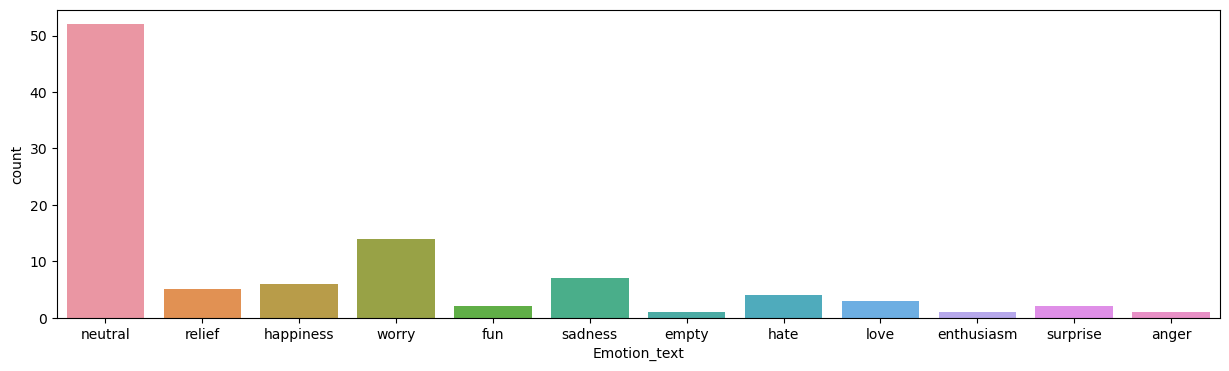

In [104]:
plt.figure(figsize=(15,4))
sns.countplot(x='Emotion_text', data=speaker_df);

In [374]:
# rearrange all the columns for easy reference and create a new dataframe
speaker_df_text = speaker_df[['conversation_id','reply_to','text','Emotion_text']]

In [376]:
speaker_df_text.head(20)

,conversation_id,reply_to,text,Emotion_text
0,L1044,L1044,They do not!,neutral
1,L984,L984,I hope so.,relief
2,L924,L924,Let's go.,happiness
3,L870,L871,Okay -- you're gonna need to learn how to lie.,worry
4,L870,NaN,I'm kidding. You know how sometimes you just ...,neutral
5,L866,L868,Like my fear of wearing pastels?,neutral
6,L866,L866,What good stuff?,fun
7,L862,L863,"Me. This endless ...blonde babble. I'm like, ...",sadness
8,L862,NaN,do you listen to this crap?,sadness
9,L860,NaN,"Then Guillermo says, ""If you go any lighter, y...",sadness


In [377]:
speaker_df_neutral = speaker_df_text[(speaker_df_text['Emotion_text'] == 'neutral')]

In [378]:
speaker_df_neutral

,conversation_id,reply_to,text,Emotion_text
0,L1044,L1044,They do not!,neutral
4,L870,NaN,I'm kidding. You know how sometimes you just ...,neutral
5,L866,L868,Like my fear of wearing pastels?,neutral
10,L696,L697,But,neutral
11,L696,NaN,"Well, no...",neutral
12,L693,L693,I was?,neutral
13,L662,L662,Tons,neutral
14,L577,NaN,You know Chastity?,neutral
15,L575,NaN,Hi.,neutral
16,L404,L406,Who knows? All I've ever heard her say is tha...,neutral


In [381]:
speaker_df_relief = speaker_df_text[(speaker_df_text['Emotion_text'] == 'relief')]

In [382]:
speaker_df_relief

,conversation_id,reply_to,text,Emotion_text
1,L984,L984,I hope so.,relief
47,L589,L589,Queen Harry?,relief
51,L1021,NaN,Is that woman a complete fruit-loop or is it j...,relief
52,L1007,L1010,No! I just wanted,relief
53,L1007,L1008,I just wanted --,relief


In [383]:
speaker_df_sadness = speaker_df_text[(speaker_df_text['Emotion_text'] == 'sadness')]

In [384]:
speaker_df_sadness

,conversation_id,reply_to,text,Emotion_text
7,L862,L863,"Me. This endless ...blonde babble. I'm like, ...",sadness
8,L862,NaN,do you listen to this crap?,sadness
9,L860,NaN,"Then Guillermo says, ""If you go any lighter, y...",sadness
28,L204,L204,Unsolved mystery. She used to be really popul...,sadness
88,L538,L538,"Daddy, no!",sadness
93,L517,NaN,"Daddy, I --",sadness
95,L179,L182,"But it's not fair -- she's a mutant, Daddy!",sadness


In [385]:
speaker_df_text[(speaker_df_text['Emotion_text'] == 'fun')]

,conversation_id,reply_to,text,Emotion_text
6,L866,L866,What good stuff?,fun
86,L878,NaN,"Daddy, I want to discuss the prom with you. It...",fun


In [386]:
speaker_df_text[(speaker_df_text['Emotion_text'] == 'anger')]

,conversation_id,reply_to,text,Emotion_text
90,L523,NaN,"Daddy, people expect me to be there!",anger


In [387]:
speaker_df_text[(speaker_df_text['Emotion_text'] == 'hate')]

,conversation_id,reply_to,text,Emotion_text
27,L207,NaN,"Gosh, if only we could find Kat a boyfriend...",hate
58,L909,L909,I'm not stupid enough to repeat your mistakes.,hate
64,L893,L897,But you hate Joey,hate
77,L441,L444,I think you're a freak. I think you do this t...,hate


In [389]:
speaker_df_text[(speaker_df_text['Emotion_text'] == 'love')]

,conversation_id,reply_to,text,Emotion_text
31,L198,NaN,You're asking me out. That's so cute. What's ...,love
69,L655,NaN,I don't get you. You act like you're too good...,love
94,L189,NaN,But she doesn't want to date.,love


In [107]:
speaker_df_neutral_2 = speaker_df[(speaker_df['Emotion_text2'] == 'neutral')]

In [108]:
speaker_df_neutral_2

,character_id,character_name,gender,movie_id,movie_name,release_year,conversation_id,reply_to,text,text_movie_token,clean_text,emotion,Emotion_text,Emotion_text2
0,u0,BIANCA,f,m0,NaN,NaN,L1044,L1044,They do not!,[],they do not,3,neutral,neutral
4,u0,BIANCA,f,m0,10 things i hate about you,1999,L870,NaN,I'm kidding. You know how sometimes you just ...,"['im', 'kidding', 'know', 'sometimes', 'become...",i m kidding you know how sometimes you just ...,3,neutral,neutral
5,u0,BIANCA,f,m0,NaN,NaN,L866,L868,Like my fear of wearing pastels?,"['like', 'fear', 'wearing', 'pastel']",like my fear of wearing pastels,3,neutral,neutral
10,u0,BIANCA,f,m0,NaN,NaN,L696,L697,But,[],but,3,neutral,neutral
11,u0,BIANCA,f,m0,10 things i hate about you,1999,L696,NaN,"Well, no...",['well'],well no,3,neutral,neutral
12,u0,BIANCA,f,m0,NaN,NaN,L693,L693,I was?,[],i was,3,neutral,neutral
13,u0,BIANCA,f,m0,NaN,NaN,L662,L662,Tons,['ton'],tons,3,neutral,neutral
14,u0,BIANCA,f,m0,10 things i hate about you,1999,L577,NaN,You know Chastity?,"['know', 'chastity']",you know chastity,3,neutral,neutral
15,u0,BIANCA,f,m0,10 things i hate about you,1999,L575,NaN,Hi.,['hi'],hi,3,neutral,neutral
17,u0,BIANCA,f,m0,NaN,NaN,L404,L404,Lesbian? No. I found a picture of Jared Leto ...,"['lesbian', 'found', 'picture', 'jared', 'leto...",lesbian no i found a picture of jared leto ...,3,neutral,neutral


In [109]:
speaker_df["Emotion_text"].value_counts()

neutral       52
worry         14
sadness        7
happiness      6
relief         5
hate           4
love           3
fun            2
surprise       2
empty          1
enthusiasm     1
anger          1
Name: Emotion_text, dtype: int64

In [110]:
speaker_df["Emotion_text2"].value_counts()

neutral       48
worry         13
sadness       10
hate           7
relief         5
surprise       4
happiness      3
love           3
fun            1
empty          1
enthusiasm     1
boredom        1
anger          1
Name: Emotion_text2, dtype: int64

In [111]:
movie_predict2["character_name"].value_counts()


JACK             3032
JOE              1897
GEORGE           1748
FRANK            1537
NICK             1484
                 ... 
HARRY'S VOICE       3
MRS. MACBRIDE       3
WOMAN CABBIE        3
DOBRYNIN            3
MASON & ARLO        1
Name: character_name, Length: 5353, dtype: int64

In [112]:
#M0=(movie_predict2['movieid']='m0')

movie_predict_3 = movie_predict2[(movie_predict2['character_id'] == 'u4525')]

In [113]:
movie_predict_3

,character_id,character_name,gender,movie_id,movie_name,release_year,conversation_id,reply_to,text,text_movie_token,clean_text,emotion,Emotion_text,Emotion_text2
136115,u4525,DANTE,m,m299,NaN,NaN,L134358,L134361,Like I'm responsible for all the smokers!,"['like', 'im', 'responsible', 'smoker']",like i m responsible for all the smokers,1,neutral,sadness
136116,u4525,DANTE,m,m299,NaN,NaN,L134358,L134359,"Yeah, but not in here.",['yeah'],yeah but not in here,3,neutral,neutral
136117,u4525,DANTE,m,m299,clerks.,1994,L134358,NaN,"That's it, everybody out.","['thats', 'everybody']",that s it everybody out,10,empty,boredom
136118,u4525,DANTE,m,m299,NaN,NaN,L134348,L134351,"You're loitering in here, and causing a distur...","['youre', 'loitering', 'causing', 'disturbance']",you re loitering in here and causing a distur...,3,neutral,neutral
136119,u4525,DANTE,m,m299,NaN,NaN,L134348,L134349,I think you'd better leave now.,"['think', 'youd', 'better', 'leave']",i think you d better leave now,4,happiness,worry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136647,u4525,DANTE,m,m299,NaN,NaN,L135268,L135269,Dante Hicks. Why? What is this about?,"['dante', 'hick']",dante hicks why what is this about,3,neutral,neutral
136648,u4525,DANTE,m,m299,clerks.,1994,L135268,NaN,I'm not out of shape!,"['im', 'shape']",i m not out of shape,10,boredom,boredom
136649,u4525,DANTE,m,m299,NaN,NaN,L135264,L135264,I've been here since six o'clock this morning....,"['ive', 'since', 'six', 'oclock', 'morning']",i ve been here since six o clock this morning ...,9,worry,happiness
136650,u4525,DANTE,m,m299,NaN,NaN,L135258,L135260,What?,[],what,3,neutral,neutral


In [114]:
movie_predict_3["movie_id"].value_counts()

m299    537
Name: movie_id, dtype: int64

In [115]:
movie_predict_3["character_id"].value_counts()

u4525    537
Name: character_id, dtype: int64

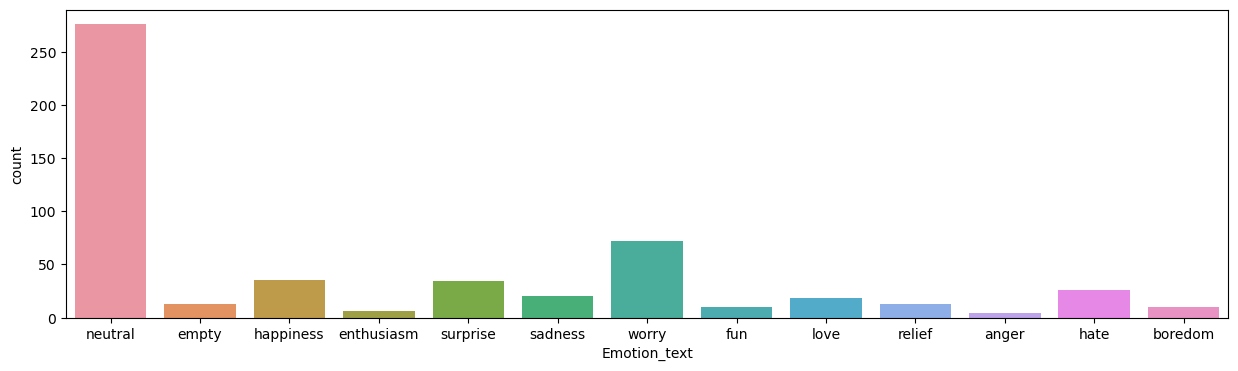

In [116]:
plt.figure(figsize=(15,4))
sns.countplot(x='Emotion_text', data=movie_predict_3);

In [372]:
movie_predict_3["movie_name"].value_counts()

clerks.    68
Name: movie_name, dtype: int64

In [390]:
#M0=(movie_predict2['movieid']='m0')

movie_predict_3

,character_id,character_name,gender,movie_id,movie_name,release_year,conversation_id,reply_to,text,text_movie_token,clean_text,emotion,Emotion_text,Emotion_text2
136115,u4525,DANTE,m,m299,NaN,NaN,L134358,L134361,Like I'm responsible for all the smokers!,"['like', 'im', 'responsible', 'smoker']",like i m responsible for all the smokers,1,neutral,sadness
136116,u4525,DANTE,m,m299,NaN,NaN,L134358,L134359,"Yeah, but not in here.",['yeah'],yeah but not in here,3,neutral,neutral
136117,u4525,DANTE,m,m299,clerks.,1994,L134358,NaN,"That's it, everybody out.","['thats', 'everybody']",that s it everybody out,10,empty,boredom
136118,u4525,DANTE,m,m299,NaN,NaN,L134348,L134351,"You're loitering in here, and causing a distur...","['youre', 'loitering', 'causing', 'disturbance']",you re loitering in here and causing a distur...,3,neutral,neutral
136119,u4525,DANTE,m,m299,NaN,NaN,L134348,L134349,I think you'd better leave now.,"['think', 'youd', 'better', 'leave']",i think you d better leave now,4,happiness,worry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136647,u4525,DANTE,m,m299,NaN,NaN,L135268,L135269,Dante Hicks. Why? What is this about?,"['dante', 'hick']",dante hicks why what is this about,3,neutral,neutral
136648,u4525,DANTE,m,m299,clerks.,1994,L135268,NaN,I'm not out of shape!,"['im', 'shape']",i m not out of shape,10,boredom,boredom
136649,u4525,DANTE,m,m299,NaN,NaN,L135264,L135264,I've been here since six o'clock this morning....,"['ive', 'since', 'six', 'oclock', 'morning']",i ve been here since six o clock this morning ...,9,worry,happiness
136650,u4525,DANTE,m,m299,NaN,NaN,L135258,L135260,What?,[],what,3,neutral,neutral


In [392]:
# rearrange all the columns for easy reference and create a new dataframe
speaker_Dante = movie_predict_3[['conversation_id','reply_to','Emotion_text','text']]

In [393]:
speaker_Dante

,conversation_id,reply_to,Emotion_text,text
136115,L134358,L134361,neutral,Like I'm responsible for all the smokers!
136116,L134358,L134359,neutral,"Yeah, but not in here."
136117,L134358,NaN,empty,"That's it, everybody out."
136118,L134348,L134351,neutral,"You're loitering in here, and causing a distur..."
136119,L134348,L134349,happiness,I think you'd better leave now.
...,...,...,...,...
136647,L135268,L135269,neutral,Dante Hicks. Why? What is this about?
136648,L135268,NaN,boredom,I'm not out of shape!
136649,L135264,L135264,worry,I've been here since six o'clock this morning....
136650,L135258,L135260,neutral,What?


In [394]:
speaker_Dante[(speaker_Dante['Emotion_text'] == 'boredom')]

,conversation_id,reply_to,Emotion_text,text
136304,L135186,NaN,boredom,Can you imagine being halfway decent to the cu...
136467,L135273,L135274,boredom,Caitlin Bree. Yeah?
136492,L135679,L135707,boredom,I jacked the car up. All she did was loosen th...
136504,L135679,L135683,boredom,The difference is you exploit a weakness.
136516,L134554,L134560,boredom,If you'll just tell me the title of your renta...
136565,L134526,L134529,boredom,"What the hell is that anyway, ""something like ..."
136576,L134507,L134508,boredom,But... but you said you only had sex with thre...
136590,L134454,L134469,boredom,"Animal, vegetable, or mineral."
136612,L134412,L134426,boredom,How do you figure?
136648,L135268,NaN,boredom,I'm not out of shape!


In [395]:
speaker_Dante[(speaker_Dante['Emotion_text'] == 'neutral')]

,conversation_id,reply_to,Emotion_text,text
136115,L134358,L134361,neutral,Like I'm responsible for all the smokers!
136116,L134358,L134359,neutral,"Yeah, but not in here."
136118,L134348,L134351,neutral,"You're loitering in here, and causing a distur..."
136121,L134326,L134327,neutral,"If you're going to drink it in here, I'd appre..."
136122,L134326,NaN,neutral,Maybe you should take that coffee outside.
...,...,...,...,...
136645,L135309,L135311,neutral,WHAT?
136646,L135309,L135309,neutral,What's this?
136647,L135268,L135269,neutral,Dante Hicks. Why? What is this about?
136650,L135258,L135260,neutral,What?


In [396]:
speaker_Dante[(speaker_Dante['Emotion_text'] == 'love')]

,conversation_id,reply_to,Emotion_text,text
136154,L135360,L135418,love,Cute. Tell me you wouldn't want to go out agai...
136162,L135360,L135402,love,You lie.
136222,L135781,L135786,love,No thanks. I'll take care of it. We've got a l...
136237,L135755,L135755,love,Why the fuck did you tell Veronica that I was ...
136240,L135631,L135663,love,"My mother told me once that when I as three, m..."
136266,L135536,L135539,love,I love your sexy talk. It's so... kindergarten...
136277,L135459,L135479,love,She's not going to marry that guy. She went ho...
136363,L134968,NaN,love,Pull my laces tighter.
136378,L134912,L134912,love,"Shut up! Yes, I've calmed down, I'm still not..."
136434,L134608,L134643,love,Because there was a lot of good in our relatio...


In [397]:
speaker_Dante[(speaker_Dante['Emotion_text'] == 'fun')]

,conversation_id,reply_to,Emotion_text,text
136148,L135360,L135430,fun,What about Sing?
136152,L135360,L135422,fun,Let me take you out tonight.
136217,L134973,L134977,fun,I've got a responsibility here. I can't let ev...
136292,L135216,L135223,fun,"Please, get the hell out of here."
136360,L134980,L134980,fun,At least let me maintain some semblance of man...
136403,L134817,L134817,fun,Wait.
136455,L134597,L134599,fun,Don't screw with it. It makes us look suspicious.
136598,L134454,NaN,fun,What the hell was that for?
136609,L134412,L134432,fun,"Now, making a woman cum... therein lies a chal..."
136636,L134722,L134722,fun,I'll throw this out. Precautionary measure.


In [398]:
speaker_Dante[(speaker_Dante['Emotion_text'] == 'worry')]

,conversation_id,reply_to,Emotion_text,text
136145,L135360,L135436,worry,So what are you saying?
136155,L135360,L135416,worry,Give me a bit more credit. I think it's time w...
136174,L135360,L135378,worry,"No, you're not really getting married?"
136175,L135360,L135376,worry,So you're really getting married?
136179,L135360,L135368,worry,"You could've broke it to me gently, you know; ..."
...,...,...,...,...
136632,L134378,L134382,worry,"Please, Veronica. Last thing I need is a lectu..."
136634,L134378,L134378,worry,Too hard?! I don't have enough indignities in ...
136637,L134717,L134720,worry,I think it's coming now...
136644,L135315,NaN,worry,What are you talking about?
